In [2]:
import random
from pandas import HDFStore as HDF
import matplotlib.pyplot as plt

In [3]:
import model_tools

In [36]:
from model_tools import TS, Special_TS
from model_tools import load_data, load_hdf
from model_tools import Visual 
from model_tools import cut, cut_dict 
from model_tools import make_matrix
from model_tools import Load_analysis, Analysis
from model_tools import np
from model_tools import DF

In [5]:
plot = Visual.plot
plot2 = Visual.plot2
curve = Visual.curve
whiskers = Visual.whiskers
histogram = Visual.histogram
compare = Visual.compare
panel = Visual.panel


In [6]:
# adresy:
# "F:\diplomka\model\data\hdf_final"
# "d:\moje_dokumenty\Desktop\diplomka\model\data\chosen"
# "d:\moje_dokumenty\Desktop\diplomka\model\data\special"
# "d:\moje_dokumenty\Desktop\diplomka\model\data\hdf_final"

In [7]:
%cd "d:\moje_dokumenty\Desktop\diplomka\model\data\special"

d:\moje_dokumenty\Desktop\diplomka\model\data\special


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [8]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [9]:
panels = ("main", "ill", "int_trade", "sentiments",  "yearly", "money", 
          "labor", "profits",  "industry", "cons", "cycles")

In [10]:
pans = {ind: pan for ind, pan in enumerate(panels)}

In [11]:
basic_vs = ["inflation_y",
            "mean_real_wage_m",
            "total_export_rates_m",
            "total_import_rates_m",
            "total_trade_balances_m",
            "excessive_debt_rate_m",
            "firm_sentiment",
            "self_financing_ratio_m",
            "production",
            "prices",
            "total_export_rates_y"]

In [23]:
shocks_load = Load_analysis(2, "final_shock_", 5, 
                            scenario_names = ["normal", "at second's bottom", "after first's bottom", "after start"])

In [28]:
shocks = Analysis(shocks_load)

In [37]:
shocks.analyze_recs()

ValueError: min() arg is an empty sequence

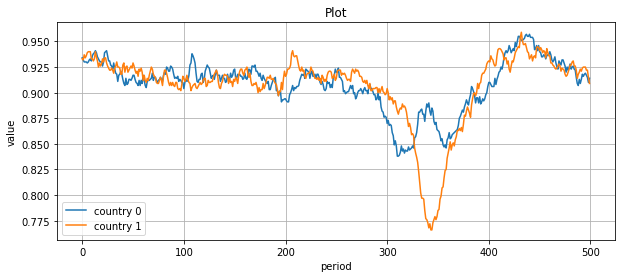

In [22]:
plot(test.data_list[0][0]["employment"].means())

In [41]:
import pickle

In [40]:
def plot(series, 
             marker = "-", size = (10,4),  
             x_label = "period", y_label = "value", 
             title = "Plot", legend = None,
             zipping = True,
            grid = True,
            path = None,
        return_plot_obj = False, plot_obj_path = None):
    """Plots multiple time series."""
    if zipping:
        ys = list(zip(*series))
    else:
        ys = series
    plt.rcParams["figure.figsize"] = size
    plt.plot(ys, marker) 
    plt.ylabel(y_label)
    plt.xlabel(x_label)         # months or years
    plt.title(title)
    if legend is None:
        legend = ["country " + str(i) for i in range(len(series))]
    plt.legend(legend)
    if grid:
        plt.grid()
        
    if path is not None:
        plt.savefig(path)
    plt.show()
    plt.close()
 

In [118]:
def plot2(series,
              marker = "-", size = (10,4),
              x_label = "period", y_label = "value", y_lim = None, x_lim = None,
              title = "Plot", legend = None,
              series2 = None, y2_lim = None, y2_label = "value 2", legend2 = None, marker2 = "-",
              zipping = True, zipping2 = True,
              grid = True,
              path = None,
         return_plot_obj = False, plot_obj_path = None, 
          title_size = 16):
    """Plots multiple time series."""
    if zipping:
        ys = list(zip(*series))
    else:
        ys = series
    
    plt.rcParams["figure.figsize"] = size
    fig, ax = plt.subplots()
    plt.title(title)
    #fig.suptitle(title, fontsize=title_size)
        
    plots = ax.plot(ys, marker)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if legend is None:
        legend = ["country " + str(i) for i in range(len(series))]
    legend = legend[:len(plots)]
    if y_lim is not None:
        ax.set_ylim(y_lim)
    if x_lim is not None:
        ax.set_xlim(x_lim)
            
    if series2 is not None:
        ax2 = ax.twinx()
        ax2._get_lines.prop_cycler = ax._get_lines.prop_cycler
        if zipping2:
            ys2 = list(zip(*series2))
        else:
            ys2 = series2
        plots += ax2.plot(ys2, marker2)
        ax2.set_ylabel(y2_label)
        if legend2 is None:
            legend2 = ["country " + str(i) for i in range(len(series2))]
        legend += legend2
        #ax2.legend(legend2)
        if y2_lim is not None:
            ax2.set_ylim(y2_lim)
        
    ax.legend(plots, legend)        
    if grid:
        plt.grid()
    
    if plot_obj_path is not None:
        with open(plot_obj_path+'.pickle','wb') as fid:
            pickle.dump(fig, fid)
    if path is not None:
        plt.savefig(path, bbox_inches = "tight")
    if return_plot_obj:
        return(fig)
    plt.show()
    plt.close()  

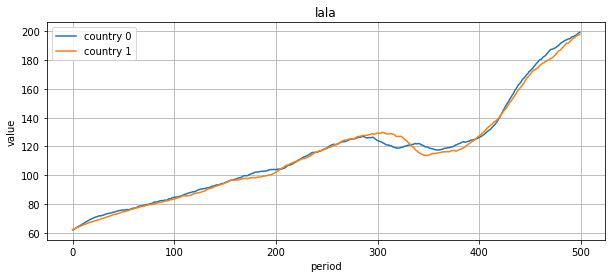

In [120]:
price_fig = plot2(test.data_list[0][0]["prices"].means(), return_plot_obj = True, title = "lala",
                plot_obj_path= "d:/moje_dokumenty/Desktop/diplomka/model/text parts/tables/trial_objects/lala")

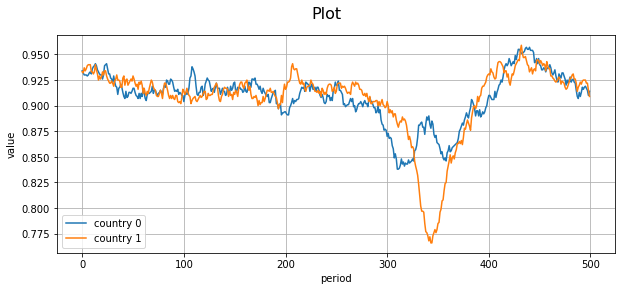

In [110]:
empl_fig = plot2(test.data_list[0][0]["employment"].means(), return_plot_obj = True)

In [112]:
empl_fig.axes

[<AxesSubplot:xlabel='period', ylabel='value'>]

In [114]:
# get plotted data
empl_axes = empl_fig.axes[0]
empl_lines = empl_axes.lines
empl_C0 = empl_lines[0].get_ydata()  # get_xdata() , get_xydata()

price_axes = price_fig.axes[0]
price_lines = price_axes.lines
price_C0 = price_lines[0].get_ydata()  # get_xdata() , get_xydata()

In [116]:
empl_axes.set_title("empl")

Text(0.5, 1.0, 'empl')

In [117]:
price_fig.axes[0].get_xlabel()

'period'

In [76]:
empl_fig.plot(empl_C0, empl_lines[1].get_ydata())

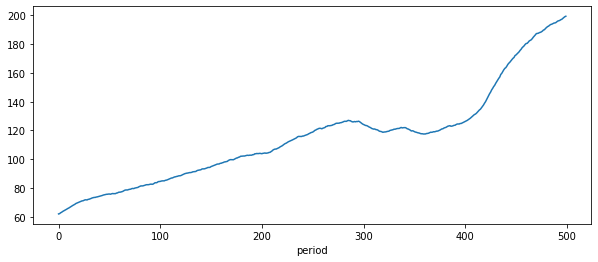

In [107]:
fig2, ax2 = plt.subplots()
ax2.plot(price_fig.axes[0].lines[0].get_ydata())
ax2.set_xlabel(price_fig.axes[0].get_xlabel())
plt.show()